In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=45,  # Randomly rotate images by up to 45 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    horizontal_flip=True,  # Randomly flip images horizontally
    zoom_range=0.2  # Randomly zoom in on images
)
train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical')

val_test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = val_test_datagen.flow_from_directory(
    'data/validation',
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical')

test_generator = val_test_datagen.flow_from_directory(
    'data/test',
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical')

Found 17500 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.


In [3]:
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16

# Load the VGG16 model with weights pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
# Add additional layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [57]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])

In [58]:
# Train the model
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[tensorboard_callback], verbose=1)

Epoch 1/10
547/547 [==============================] - 181s 329ms/step - loss: 0.3739 - accuracy: 0.8562 - val_loss: 0.1550 - val_accuracy: 0.9416
Epoch 2/10
547/547 [==============================] - 180s 328ms/step - loss: 0.2058 - accuracy: 0.9245 - val_loss: 0.1269 - val_accuracy: 0.9526
Epoch 3/10
547/547 [==============================] - 179s 328ms/step - loss: 0.1818 - accuracy: 0.9343 - val_loss: 0.1492 - val_accuracy: 0.9494
Epoch 4/10
547/547 [==============================] - 179s 328ms/step - loss: 0.1776 - accuracy: 0.9341 - val_loss: 0.1249 - val_accuracy: 0.9566
Epoch 5/10
547/547 [==============================] - 179s 328ms/step - loss: 0.1654 - accuracy: 0.9390 - val_loss: 0.1362 - val_accuracy: 0.9494
Epoch 6/10
547/547 [==============================] - 177s 324ms/step - loss: 0.1639 - accuracy: 0.9365 - val_loss: 0.0974 - val_accuracy: 0.9614
Epoch 7/10
547/547 [==============================] - 175s 320ms/step - loss: 0.1529 - accuracy: 0.9420 - val_loss: 0.1228 -

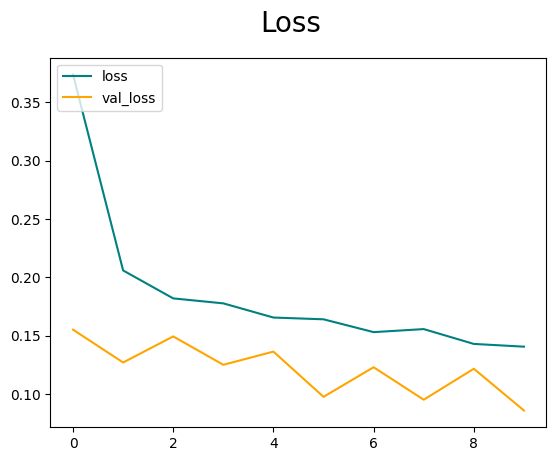

In [59]:
# Plot training and validation loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

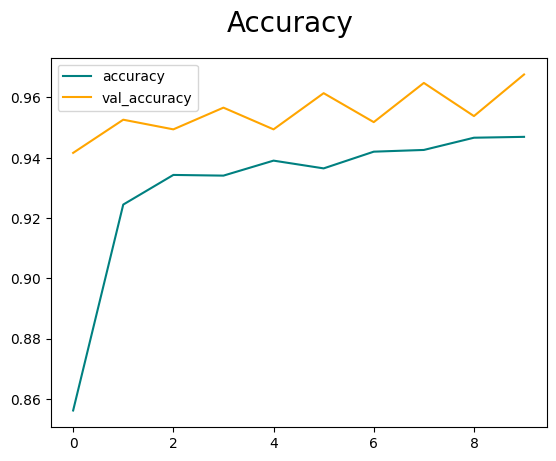

In [60]:
# Plot training and validation accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [61]:
# Evaluate the model on the test data, tracking precision and recall
loss, accuracy = model.evaluate(test_generator)
print(f"{accuracy:.4f}, {loss:.4f}")

79/79 [==============================] - 10s 123ms/step - loss: 0.0778 - accuracy: 0.9716
0.9716, 0.0778


In [78]:
from tensorflow.keras.models import load_model

model.save(os.path.join('models','colon_lung_cancer_classifier.h5'))